In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import pickle

In [15]:
df = pd.read_csv('../credit_card/data/data_scaler.csv', index_col=0)

In [16]:
df.sample(1)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
43444,CASH_OUT,0.004506,C1998009004,0.001609,0.0,C695275657,0.0,0.00087,0,0,True,False,False,False


### Train test Split

In [19]:
X = df.drop(columns=[
    'type',
    'nameOrig',
    'nameDest',
    'isFraud'
    ])

X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0.000255,0.000000,0.0,0.000000,0.000000,0,False,False,True,False
1,0.002054,0.000000,0.0,0.000999,0.001395,0,True,False,False,False
2,0.000021,0.000000,0.0,0.000000,0.000000,0,False,False,True,False
3,0.000097,0.000121,0.0,0.000000,0.000000,0,False,False,True,False
4,0.002583,0.000000,0.0,0.008395,0.008893,0,True,False,False,False


In [24]:
y = df['isFraud']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [25]:
y.value_counts()

isFraud
0    499376
1       624
Name: count, dtype: int64

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
print("Training :", X_train.shape)
print("Testing :", X_test.shape)

Training : (400000, 10)
Testing : (100000, 10)


### Modeling

In [31]:
# Selection model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(random_state=42)

In [32]:
accuracy, precision, recall, f1, roc_auc = {}, {}, {}, {}, {}

for key in models.keys():
    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predict = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(y_test, predict)
    precision[key] = precision_score(y_test, predict)
    recall[key] = recall_score(y_test, predict)
    f1[key] = f1_score(y_test, predict)
    roc_auc[key] = roc_auc_score(y_test, predict)

In [34]:
# Menampilkan evaluasi setiap model
df = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc'])
df['Accuracy'] = accuracy.values()
df['Precision'] = precision.values()
df['Recall'] = recall.values()
df['F1-Score'] = f1.values()
df['Roc_Auc'] = roc_auc.values()

round(df, 2)

,Accuracy,Precision,Recall,F1-Score,Roc_Auc
Logistic Regression,1.0,1.00,0.01,0.02,0.50
Decision Trees,1.0,0.82,0.74,0.78,0.87
Random Forest,1.0,0.95,0.72,0.82,0.86
XGBoost,1.0,0.94,0.73,0.82,0.87


Classification Report model Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99881
           1       1.00      0.01      0.02       119

    accuracy                           1.00    100000
   macro avg       1.00      0.50      0.51    100000
weighted avg       1.00      1.00      1.00    100000



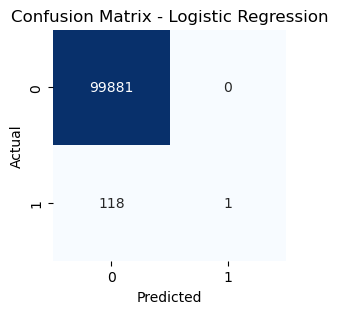

Classification Report model Decision Trees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99881
           1       0.82      0.74      0.78       119

    accuracy                           1.00    100000
   macro avg       0.91      0.87      0.89    100000
weighted avg       1.00      1.00      1.00    100000



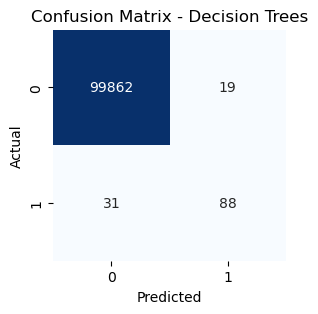

Classification Report model Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99881
           1       0.95      0.72      0.82       119

    accuracy                           1.00    100000
   macro avg       0.97      0.86      0.91    100000
weighted avg       1.00      1.00      1.00    100000



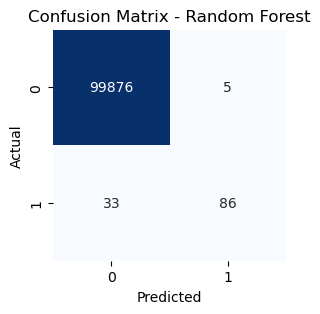

Classification Report model XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99881
           1       0.94      0.73      0.82       119

    accuracy                           1.00    100000
   macro avg       0.97      0.87      0.91    100000
weighted avg       1.00      1.00      1.00    100000



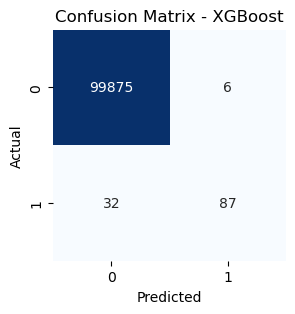

Model terbaik: RandomForestClassifier(random_state=42)


In [39]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    # Melakukan train setiap model
    model.fit(X_train, y_train)

    # Melakukan prediksi model
    predict = model.predict(X_test)

    # Best Model
    accuracy = accuracy_score(y_test, predict)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Classification Report
    print(f"Classification Report model {name}:")
    print(classification_report(y_test, predict))

    # Confusion Matrix
    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print(f"Model terbaik: {best_model}")